### SVD(Singular Value Decomposition)

#### SVD 개요

- SVD도 PCA와 유사한 행렬 분해 기법을 이용한다

- PCA는 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 행과 열의 크기가 다른 행렬에도 적용할 수 있다  → 특이값 분해

- 넘파이의 SVD를 이용해 SVD 연산을 수행하고, 분해가 어떤 식으로 되는지 예제로 알아보자

  - 넘파이의 SVD 모듈인 numpy.linalg.svd

  - 행렬의 개별 로우끼리의 의존성을 없애기 위해 4x4 랜덤 행렬을 생성하자

In [5]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이 a 행렬에 SVD를 적용해 U, Sigma, Vt를 도출하자

SVD분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치행렬을 반환한다

(선형대수의 LU분해에서의 그 U행렬

In [6]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('SIgma matrix:\n', np.round(Sigma,3))
print('V Transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
SIgma matrix:
 [3.423 2.023 0.463 0.079]
V Transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해된 행렬들을 이용해 다시 원본 행렬로 복원되는지 확인해보자

→ 각 행렬들을 내적하면된다. 단, sigma의 경우, 0이 아닌 값만 1차원으로 반환했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적하면 된다.

In [7]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이번에는 데이터 세트가 로우 간 의존성이 있을 경우에 어떻게 sigma값이 변하고 이에 따른 차원 축소가 진행될 수 있는지 알아보자

In [8]:
a[2] = a[0] + a[1]   #[]은 한 row
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [9]:
#다시 SVD로 분해
U, SIgma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [3.423 2.023 0.463 0.079]


이전과 차원은 같지만 Sigma값 중 2개가 0으로 변했다.

즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미(행렬의 Rank가 2이다)

In [10]:
#U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

#V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

#다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.663 -0.255 -0.813 -0.965]
 [-0.413  1.518  2.078  0.483]
 [-1.076  1.264  1.265 -0.482]
 [-0.663 -0.255 -0.813 -0.965]]


이번엔 Truncated SVD를 이용해 행렬을 분해해보자

Truncated SVD는 ∑ 행렬에 있는 대각 원소, 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다. 이렇게 분해하면 인위적으로 더 작은 차원의 행렬들로 분해하기 때문에 원본 행렬을 정확하게 복원할 수는 없다. 하지만, 데이터 정보가 압축되어 분해함에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있다.

scipy 모듈을 이용해 간단히 테스트해보자

In [11]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

#### 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit, transform을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환한다

Text(0, 0.5, 'TruncatedSVD Component 2')

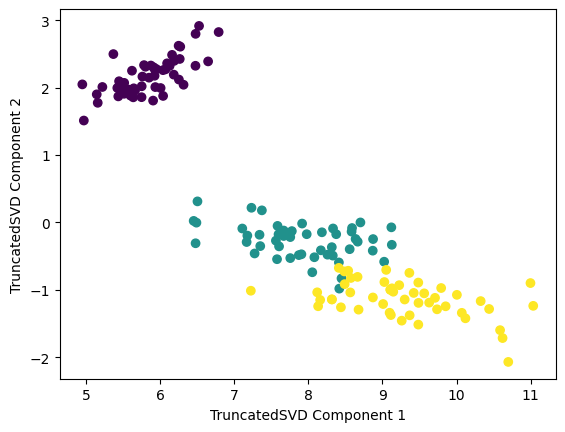

In [12]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tvsd = TruncatedSVD(n_components=2)
tvsd.fit(iris_ftrs)
iris_tvsd = tvsd.transform(iris_ftrs)

plt.scatter(x=iris_tvsd[:,0], y=iris_tvsd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

TruncatedSVD 변환 역시 PCA와 유사하게 변환 후에 어느정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있다